# **TP RSA**

#### **Présentation**
Un cryptogramme **crypto4** vous a été envoyé. Pour avoir plus d'informations sur le chiffrement utilisé, je souhaiterais que nos échanges soient un peu plus sécurisés, et pour cela, nous allons donc mettre en place des **systèmes RSA**.  
Ma **clé publique** vous a été envoyée par mail et vous devez pour commencer générer la vôtre.  
Les parties 1, 2 et 3 de ce notebook présentent les problèmes de complexité liés à la génération de nombres premiers, ce qui nous conduit finalement à utiliser des **tests de primalité probabilistes** pour la génération des clés.  
Une fois votre clé RSA générée, vous me l'envoyez (sans signature dans un premier temps) et je vous renverrai un message signé avec la clé de chiffrement de **crypto4**, que vous n'aurez plus qu'à déchiffrer.  
**Remarque** : pour l'exposant, nous choisirons $e=2^16+1$

# **1. Primalité : fonction premier(n)**

La fonction Python **premier(n)**, vue en première année, prend en entrée un entier naturel **n** et retourne un **booléen** : **True** si l’entier **n** est premier et **False** s’il ne l’est pas.

In [1]:
def premier(n):
    prem = True
    if n<=1 : 
        prem = False
    else : 
        # Parcourir tous les entiers de 2 jusqu'à la racine carrée de n
        for i in range(2, int(n**0.5) + 1) :
            # Vérifier si i divise n
            if n % i == 0 :
                prem = False
    return prem

On teste :

In [2]:
premier(34)

False

In [3]:
premier(37)

True

# **2. Complexité premier(n)**
Nous avons également vu en première année la notion de **complexité en temps** d'un algorithme, qui est liée au nombre d'étapes et aux opérations nécessaires pour arriver au résultat. Le cas de la complexité en **grand O**, sur lequel nous nous étions penchés dans la ressource de **Méthodes numériques** en S2, est le plus "grossier". Le calcul de la complexité en **grand O** s'intéresse principalement au nombre d'étapes générées par les boucles et en général dans le **pire des cas**, ce qui signifie par exemple que dans une instruction conditionnelle (**if**), la condition est supposée toujours vraie. **Peu importe le nombre d'opérations à chaque étape** : qu'il y ait 5 ou 1000 opérations, la complexité en **grand O** est la même. 

Les calculs de complexité peuvent se faire "à la main", en analysant l'algorithme, ce qui nécessite parfois de mettre en œuvre des outils mathématiques plus ou moins avancés. 

Concernant l'algorithme de **premier(n)**, la boucle **```for i in range(2, int(n\*\*0.5) + 1) :```** comprend $\sqrt n$ étapes et nous avons une complexité en $O( \sqrt n)$

La détermination de la complexité n'est pas toujours aussi simple et on peut aussi utiliser la machine pour visualiser l'évolution de celle-ci : 
* Soit en **chronométrant** l'exécution du programme.
* Soit en utilisant des **compteurs** dans les boucles.

On représente graphiquement l'évolution de cette complexité en fonction de la taille de l'entrée. Il faut donc pour cela savoir **tracer des courbes** en Python.


## **2.1. Préalable : représenter des courbes !**
Pour mettre en évidence l'évolution de la complexité, il faut savoir tracer des courbes. Ci-dessous, un exemple de tracé permettant de représenter graphiquement la fonction $f(x)=\sqrt x=x^{0,5}$ sur $[0,100]$. 

On utilise la fonction **plot** de la collection **pyplot** de la bibliothèque **matplotlib**.
L'instruction **plot(x,y)** prend en entrée deux listes **x** et **y** et trace, en les reliant, les points de coordonnées **(x[i],y[i])**
### Notations
* Les listes **x** et **y** doivent avoir une même longueur, que l'on notera **nbPts**
* **lenInt** est la longueur de l'intervalle (lenInt = 100 pour une représentation sur $[0,100]$
* **delta** est l'écart entre chaque point dans la liste **x**, il se déduit de **nbPts** et **lenInt**

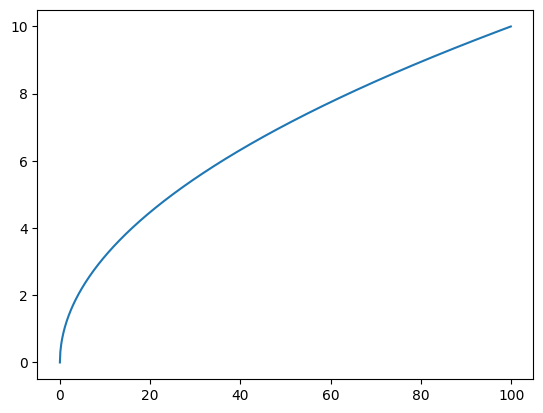

In [4]:
lenInt = 100
nbPts = 1000
delta = round(100/nbPts,1) # delta représente l'écart entre chaques points dans [0,100]. Par exemple 0.1

# Préparation des abscisses, par exemple 1000 valeurs entre 0 et 100 : 0, 0.1, 0.2, 0.3,..., 99.9
x = [ delta*i for i in range (1000)]
# Préparation des ordonnées : on calcule les images des valeurs précédentes par la fonction racine (x puissance 0,5)
y = [ val_x**0.5 for val_x in x]

# Représentation avec pyplot de matplotlib
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show() # affiche la figure à l'écran (inutile en mode interactif)


## **2.2. Chronométrer avec un "timer"**
**timeit** est une bibliothèque qui permet de chronométrer l'exécution de morceaux de programmes. 
L'inconvénient de cette mesure du temps réel est que l'exécution de l'algorithme peut être perturbée par des éléments indépendants du programme (processeur, charge...)

### **Exemple**
Nous testons la durée d'exécution de la fonction **premier(n)** pour diverses valeurs de **n**. À la différence de l'exemple précédent, les valeurs de **x** devront être entières : 
* **nbMax** : valeur maximale de **n**
* **nbPts** : nombre de valeurs testées
* **delta** : écart entre chaque valeur testée points dans $[1,nbMax]$

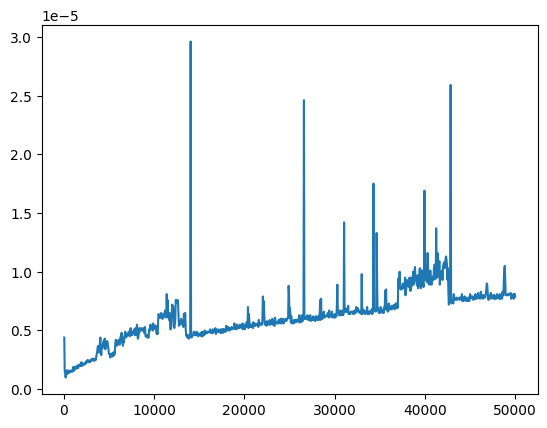

In [5]:
import timeit
nbMax = 50000
nbPts = 1000              # Nombre de valeurs testées
delta = int(nbMax/nbPts)  # Les valeurs de x doivent être entières

# Pour l'axe des x : nbPts valeurs de n, de 0 à 50000, avec un pas de 50 : 50, 100, ..., 49950, 50000
x = [ delta * i for i in range(1, nbPts+1)]
y_temps = [0] * nbPts

for i in range(nbPts) : 
    tps1 = timeit.default_timer()  # tps1 : début
    premier(x[i])
    tps2 = timeit.default_timer()  # tps2 : fin
    y_temps[i] = tps2 - tps1       # y_temps[i] : durée d'exécution de premier(x[i])

# Représentation graphique
import matplotlib.pyplot as plt
plt.plot(x,y_temps)

#### **Commentaire** : peu convaincant !

## **2.3. Introduction d'un compteur dans les boucles**
Dans l'exemple ci-dessous, on introduit un compteur qui s'incrémente à chaque nouvelle itération dans la boucle **for**. La liste **y_compteur** contient le nombre d'itérations dans la boucle **for** pour chaque valeur de **x[i]**


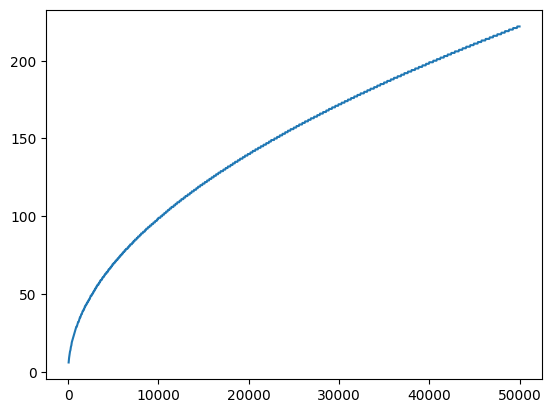

In [6]:
nbMax = 50000
nbPts = 1000              # Nombre de valeurs testées
delta = int(nbMax/nbPts)  # Les valeurs de x doivent être entières

# Pour l'axe des x : nbPts valeurs de n, de 0 à 50000, avec un pas de 50 : 50, 100, ..., 49950, 50000
x = [ delta * i for i in range(1, nbPts+1)]
y_compteur = [0] * nbPts

# Création d'une fonction renvoyant le nombre d'étape de la boucle de la fonction premier, selon n
def compteurPremier(n):
    prem = True
    compt = 0
    if n<=1 : 
        prem = False
    else : 
        # Parcourir tous les entiers de 2 jusqu'à la racine carrée de n
        for i in range(2, int(n**0.5) + 1) :
            # Nouvelle étape dans la boucle : incrémentation du compteur
            compt += 1
            # Vérifier si i divise n
            if n % i == 0 :
                prem = False
    return compt

# valeurs y_compteur
for i in range(nbPts) : 
    y_compteur[i] = compteurPremier(x[i])

# Représentation graphique
import matplotlib.pyplot as plt
plt.plot(x,y_compteur)

### Remarque (facultatif): continuité de la courbe ci-dessus
Exécuter le programme précédent en changeant les paramètres **nbMax** et **nbPts** de sorte que les valeurs de x correspondent tout simplement aux 500 premiers entiers non nuls.
* **nbMax = 500**
* **nbPts = 500**

**Que remarque-t-on ?**
* Que peut-on dire de la continuité de la fonction représentée ?
* Pouvez-vous l'expliquer ?

Lorsque 𝑥 correspond aux entiers naturels successifs, la fonction représentée est discrète et non continue. Cela reflète la nature même du problème, car on manipule des propriétés spécifiques aux nombres entiers.

## **2.4. Complexité de premier(n) en fonction du nombre de bits utilisés stocker n**
En Python, la fonction **n.bit_length()** renvoie le nombre de bits nécessaires pour représenter le nombre entier **n** en binaire. 

Plus précisément, pour un entier **$n > 0$**, **n.bit_length()** correspond à l'unique entier positif $p$ tel que : $2^{p-1} \le n < 2^p$.

Ce qui revient à : $p = \lfloor \log _2 (n) \rfloor + 1$  
On a donc **```int(np.log2(n)) + 1 == n.bit_length()```**

*La encore la formule a été vue dans la ressource de Méthodes numériques en S2*

Nous allons maintenant représenter graphiquement l'évolution de la complexité de **premier(n)**, évaluée avec le compteur d'itérations, en fonction non plus de n, mais du nombre de bits utilisés pour stocker **n**

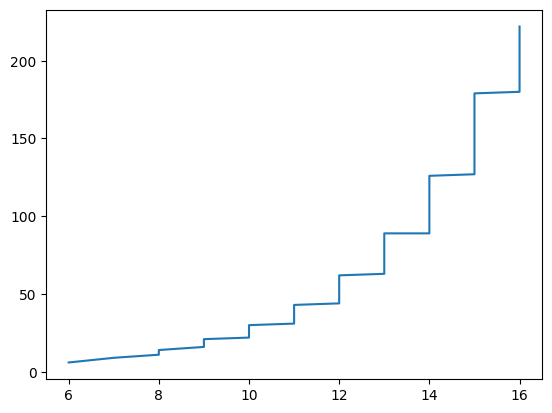

In [7]:
nbMax = 50000
nbPts = 1000              # Nombre de valeurs testées
delta = int(nbMax/nbPts)  # Les valeurs de x doivent être entières

x = [delta * i for i in range(1, nbPts+1)] # x contient nbPts entiers 
b = [int.bit_length(n) for n in x]         # b contient les nombres de bits nécessaires au stockage des entiers de x
y_compteur = [0] * nbPts

# valeurs y_compteur : on utilise la fonction compteurPremier(n) précédente
# la liste y_compteur est la même que précédemment
for i in range(nbPts) : 
    y_compteur[i] = compteurPremier(x[i])

# Représentation graphique : y_compteur en fonction du nombre de bits (valeurs de b) et non plus de n (valeurs de x)
import matplotlib.pyplot as plt
plt.plot(b,y_compteur)

### Avec d'autres paramètres ?
*On pourra tester d'autres valeurs de **nbMax** pour percevoir le ralentissement de l'algorithme.*

### Bilan important
Le résultat ci-dessus était prévisible. L'algorithme de primalité que nous avons utilisé dans la fonction **premier(n)** a une complexité en $n$ de $\sqrt n$ mais si on note $p$ le nombre de bits utilisés pour coder $n$ : $2^{p-1} \le  {n} < 2^p$  (car $\sqrt {n} = n^\frac {1}{2})$  
Nous avons donc aussi : $2^ \frac {p-1}{2} \le \sqrt n < 2^ \frac {p}{2}$   
Si on note $p$ le nombre de bits utilisés pour coder $n$ la complexité $2^{\frac p 2}$ est exponentielle. 

# **3. Générer des nombres premiers pour le RSA**
## **3.1. Choix au hasard d'un nombre écrit sur p bits**
Dans la librairie random, la fonction random.randint(borneInf, borneSup) permet de choisir un entier $n$ au hasard :  $\text {borneInf} \le n \le \text{borneSup}$  
Les entiers écrits sur $p$ bits sont les entiers $n$ compris entre $2^{p-1} \le  {n} < 2^p$.  
Le programme suivant permet de choisir au hasard un nombre entier écrit sur $p$ bits.

In [8]:
import random
p = 8
borneInf = 2**(p - 1)  
borneSup = 2**p - 1
nombre = random.randint(borneInf, borneSup)
nombre

138

## **3.2. Choix au hasard d'un nombre premier écrit sur $p$ bits**
Écrire un programme permettant de générer un nombre premier aléatoire de $p$ bits. On pourra utiliser la fonction **premier(n)**.  

**Remarque :** Si $\pi (n)$ désigne le nombre de nombres premiers inférieurs ou égaux à $n$, alors $ \pi(n) \cong \frac{n}{\ln(n)}$ quand $n$ est grand. Ce qui signifie que pour un nombre inférieur à $n$ tiré au hasard, la probabilité qu'il soit premier est d'environ $\frac {1} {\ln(n)}$, ce qui signifie qu'il faut en moyenne choisir $\ln(n) $ nombres  premiers inférieurs à $n$ pour en trouver un premier. 
Pour obtenir un nombre entier écrit sur $p$ bits, nous en testerons en moyenne $\ln(2^p)$, qui est en $O(p)$.

In [9]:
nombre =1
while not premier(nombre) : 
    nombre = random.randint(borneInf, borneSup)
print(nombre)

241


**Génération de nombres premiers selon le nombre bits**
Durée de traitement ?

3 4 1.2599979527294636e-05
4 8 6.00004568696022e-06
5 16 5.399924702942371e-06
6 62 3.899913281202316e-06
7 85 9.199953638017178e-06
8 196 2.500019036233425e-06
9 435 1.2800097465515137e-05
10 701 3.7499936297535896e-05
11 1908 8.599949069321156e-06
12 2425 1.0200077667832375e-05
13 4588 4.069996066391468e-05
14 14593 5.4299947805702686e-05
15 32618 4.2100087739527225e-05
16 48892 0.0002180000301450491
17 72628 0.0005059000104665756
18 242107 0.00026350002735853195
19 415277 0.00015320000238716602
20 962102 0.0009738000808283687
21 1884190 0.0006661999505013227
22 2362928 0.004076300072483718
23 4387861 0.00022479996550828218
24 12843221 0.007092400104738772
25 24623331 0.0005159999709576368
26 57299363 0.012754500028677285
27 132257343 0.02757709997240454
28 227105001 0.01697469991631806
29 450310895 0.0077454999554902315
30 611150373 0.0037002000026404858
31 1522253270 0.03956039994955063
32 3464958100 0.04924820002634078
33 6664206905 0.1697538000298664
34 11308650737 0.564590499969

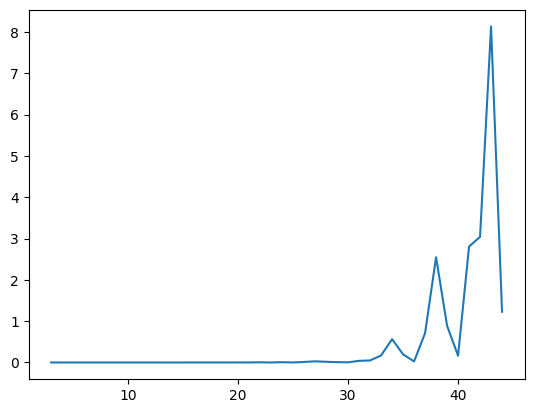

In [10]:
import timeit
import random

nbMax = 45
b = [i for i in range(3, nbMax)]   # liste de nombre de bits

y_temps = []
nombrePrem = []
for p in b : 
    borneInf = 2**(p - 1)  
    borneSup = 2**p - 1    
    tps1 = timeit.default_timer()  # tps1 : début
    nb = random.randint(borneInf, borneSup) # on génère un nombre compris entre 2^(p-1) et 2^p
                                            # c'est à dire écrit sur p bits, jusqu'à en trouver un premier
    while not premier(random.randint(borneInf, borneSup)):
        nb = random.randint(borneInf, borneSup)
    tps2 = timeit.default_timer()  # tps2 : fin
    y_temps.append(tps2 - tps1)  
    print(p,nb,tps2-tps1)

import matplotlib.pyplot as plt
plt.plot(b,y_temps)

## Bilan
Plusieurs secondes pour générer un nombre premier écrit sur une quarantaine de bits, et nous souhaitons générer une clé RSA de 2024 bits.  
**Question : quel doit être le nombre de bits minimum nécessaire au codage des entiers premiers $p$ et $q$ générant une clé RSA de 2024 bits ?** 
1012 bits chacun

À la lumière de la réponse à cette question, la méthode précédente semble inutilisable pour générer un grand nombre premier. Nous allons utiliser une autre approche, probabiliste cette fois-ci, c'est-à-dire que nous allons générer des nombres dont la **probabilité** d'être premier est très grande : des nombres **pseudo-premiers**


## **3.3. Test de primalité de Fermat**
le test de primalité de Fermat est un test **probabiliste** basé sur le **petit théorème de Fermat** : s'il détecte qu'un nombre n'est pas premier (composé), il ne se trompe pas, en revanche, il peut se tromper s'il prétend que le nombre est premier.  
**Rappel du théorème** : si $p$ est un nombre premier alors pour tout entier $a$, $p$ divise $a^{p}- a$ ce qui signifie aussi que $a^{p} ≡ a[p]$. Si de plus $a$ est premier avec $p$ (et donc inversible), par exemple si $1 \le a \le p-1$, alors $a^{p-1} ≡ 1[p]$   
Le **test de primalité de Fermat** repose sur l'idée suivante  : si $p$ est composé, alors il est peu probable que $a^{p–1}$ soit congru à $1$ modulo $p$ pour une valeur de $a$ choisie au hasard entre $2$ et $p-1$

In [11]:
def testFermat(n, k):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(k):                  # k : nombre de répétitions du test
        a = random.randint(2, n - 2)    # Choisir un nombre a au hasard entre 2 et n-2
        if pow(a, n - 1, n) != 1:
            return False  # Composite
    return True  # Probablement premier

In [12]:
testFermat(13,7)

True

In [13]:
testFermat(123456789, 7)

False

#### Génération de nombres pseudos premiers selon le nombre de bits

3 5 2.1600048057734966e-05
4 13 1.6299891285598278e-05
5 23 1.009996049106121e-05
6 61 6.400048732757568e-06
7 71 1.0999967344105244e-05
8 229 1.5700003132224083e-05
9 359 1.5300000086426735e-05
10 661 9.400071576237679e-06
11 1459 1.2299977242946625e-05
12 2969 1.179997343569994e-05
13 5297 9.09995287656784e-06
14 8581 1.209997572004795e-05
15 21011 2.929999027401209e-05
16 46301 5.2299932576715946e-05
17 85517 3.090000245720148e-05
18 251831 2.5000073947012424e-05
19 294313 1.98000343516469e-05
20 873541 1.7900019884109497e-05
21 1408787 2.3400061763823032e-05
22 3341743 3.42000275850296e-05
23 4892057 2.010003663599491e-05
24 10352339 2.010003663599491e-05
25 22822567 1.5900004655122757e-05
26 63305719 7.400009781122208e-05
27 133769639 2.5799963623285294e-05
28 148038131 2.589996438473463e-05
29 317631653 0.0001268000341951847
30 665512223 6.790005136281252e-05
31 2028581959 5.1900045946240425e-05
32 3414281623 6.2700011767447e-05
33 4953240811 0.00014130002819001675
34 16126703597

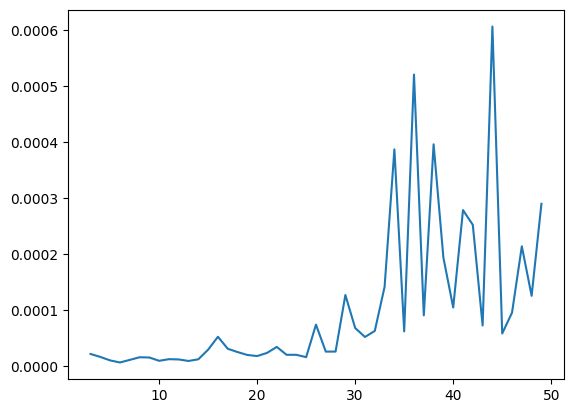

In [14]:
import timeit
import random

nbMax = 50
b = [i for i in range(3, nbMax)]   # liste de nombre de bits

y_temps = []
nombrePseudoPrem = []
for p in b : 
    borneInf = 2**(p - 1)  
    borneSup = 2**p - 1    
    tps1 = timeit.default_timer()  # tps1 : début
    nb = random.randint(borneInf, borneSup) # on génère un nombre compris entre 2^(p-1) et 2^p
                                            # c'est à dire écrit sur p bits, jusqu'à en trouver un premier
    while not testFermat(nb, 7):
        nb = random.randint(borneInf, borneSup)
    tps2 = timeit.default_timer()  # tps2 : fin
    y_temps.append(tps2 - tps1)  
    nombrePseudoPrem.append(nb)
    print(p,nb,tps2-tps1)

import matplotlib.pyplot as plt
plt.plot(b,y_temps)

In [15]:
p = 1000  # nombre de bits
borneInf = 2**(p - 1)  
borneSup = 2**p - 1    
tps1 = timeit.default_timer()  # tps1 : début
nb = random.randint(borneInf, borneSup)
while not testFermat(nb, 7):
    nb = random.randint(borneInf, borneSup)
tps2 = timeit.default_timer()  # tps2 : finnb = random.randint(borneInf, borneSup) 
print(testFermat(nb, 7))
print(nb)
tps2 = timeit.default_timer()  # tps2 : fin
print(tps2 - tps1)  

True
10041484919451504214599334923983809627818671319271708650543246757673907060712474976872028056246995414804729456151505916668828420936567992403026032093576901877704536996119635633177443761469641120625396789062325529996842910779104515892828956404863516758393329626547812047660891151416027352237919772193833
0.12202849995810539


### Commentaire : cela va beaucoup plus vite !

### Erreur du test de primalité de Fermat

Le problème principal de ce test vient de l'existence des **nombres de Carmichael** qui vérifient toujours la propriété du petit théorème de Fermat sans être premiers : si n est un nombre de Carmichael, pour tout entier $a$ premier avec $n$, $n$ divise a^{n-1}-1$  
Ils ne sont pas très nombreux, mais pour éviter le problème, on utilise habituellement plutôt le **test de primalité de Miller-Rabin**.  
On pourra aller sur Wikipédia pour comprendre puis implémenter la méthode Miller-Rabin.
En attendant, les clés suivantes seront générées avec le **test de primalité de Fermat**.

## **3.4. Génération des clés RSA**
On choisira comme exposant $e = 2^{16}+1= 65537$ et $n$ devra nécessiter 1024 bits pour sa représentation.$p$ et $q$ seront générés en utilisant les méthodes précédentes et vous en déduirez la **clé publique** et la **clé privée** de votre système de chiffrement.  
Vous enverrez votre clé publique à votre enseignante pour avoir plus d'information sur le déchiffrement de $crypto4$.

In [16]:
def GenerationCleRSA():
    nbBits = 1000  # nombre de bits
    borneInf = 2**(nbBits - 1)  
    borneSup = 2**nbBits - 1    
    p = random.randint(borneInf, borneSup)
    while not testFermat(p, 7):
        p = random.randint(borneInf, borneSup)
    q = random.randint(borneInf, borneSup)
    while not testFermat(q, 7):
        q = random.randint(borneInf, borneSup)
    n = p * q
    phi = (p - 1) * (q - 1)
    e = 65537
    d = pow(e, -1, phi)
    return ((n,e),(n,d))

clePublique, clePrivee = GenerationCleRSA()
print("Cle Publique (n,e) : ", clePublique)
print("Cle Privee (n,d) : ", clePrivee)

Cle Publique (n,e) :  (78223713081906168212772545538770231369568544338045343750303049690363061305922221845922827752247341659567641793728583545382980627877175576988105586110626309858160359892476220827380074768734549319369717265968145501170056168976445433097364406417699171739621057162742676023333749432753200196295893265558311501690069061650359329994840761837695295285579598481764055233769287778811123142171096741812473809290530126746900799580113440908751000950955509798357047113993151463793724699478970532425387754752476865915590114057159355232821504300905926767805662542856028844202621934407983148827694000028027129265944573, 65537)
Cle Privee (n,d) :  (782237130819061682127725455387702313695685443380453437503030496903630613059222218459228277522473416595676417937285835453829806278771755769881055861106263098581603598924762208273800747687345493193697172659681455011700561689764454330973644064176991717396210571627426760233337494327532001962958932655583115016900690616503593299948407618376952952855

## **4. Quelques fonctions utiles pour la suite**
* Fonction **puissance modulaire** : ```pow(m,e,n)``` permet de calculer $m^e[n]$
* **Hachage** : nous utiliserons le hachage SHA-256

In [52]:
import hashlib
#mes = open("message.txt").read()

def hashMessageVersEntier(message):
    # Empreinte du message (SHA-256)
    hash_object = hashlib.sha256(message.encode('utf-8'))
    hash_bytes = hash_object.digest()
    hash_integer = int.from_bytes(hash_bytes, byteorder='big')
    return hash_integer

hashMessageVersEntier("Bonjour")

65788391252811336389358829526500059803637055619194774207535826198778615151684

Fonction qui permet de decoder les messages en fonction de la cle publique et de la cle prive generer dans la fonction GenerationCleRSA()

In [10]:
clePrv = (78223713081906168212772545538770231369568544338045343750303049690363061305922221845922827752247341659567641793728583545382980627877175576988105586110626309858160359892476220827380074768734549319369717265968145501170056168976445433097364406417699171739621057162742676023333749432753200196295893265558311501690069061650359329994840761837695295285579598481764055233769287778811123142171096741812473809290530126746900799580113440908751000950955509798357047113993151463793724699478970532425387754752476865915590114057159355232821504300905926767805662542856028844202621934407983148827694000028027129265944573, 58682406177760910023055101719847390409766047917664820261587339030268396617264538154855971839407366109108489994791733066950794857402403790875691764058912408626828418971170383096237871370444697152552178912390311939286598586260081171219798297778753677748118914131044198951541934950658575883102485502863626875587922308654606945291298607254076315521574573985195804243214636340263015999553985696592471180000566432865139186329610979436225872981334735520908336853923305192941457497536853504971537119599877219868103443027368202228355471186395154435556501026010819272453500313758624630473967094520387704056373933)
clePub = (78223713081906168212772545538770231369568544338045343750303049690363061305922221845922827752247341659567641793728583545382980627877175576988105586110626309858160359892476220827380074768734549319369717265968145501170056168976445433097364406417699171739621057162742676023333749432753200196295893265558311501690069061650359329994840761837695295285579598481764055233769287778811123142171096741812473809290530126746900799580113440908751000950955509798357047113993151463793724699478970532425387754752476865915590114057159355232821504300905926767805662542856028844202621934407983148827694000028027129265944573, 65537)
mess1=open("message1.txt", encoding="utf-8").read()
mess2=open("message2.txt", encoding="utf-8").read()
emp1=open("empreinte1.txt", encoding="utf-8").read().strip()
emp2=open("empreinte2.txt", encoding="utf-8").read().strip()

In [11]:
import hashlib

def hashMessageVersEntier(message):
    hash_object = hashlib.sha256(message.encode('utf-8'))
    return int(hash_object.hexdigest(), 16)

def signerRSA(hash_integer, clePrivee):
    n, d = clePrivee
    signature = pow(hash_integer, d, n)
    
    return signature

signature1 = signerRSA(emp1, clePrv)

# Écrire la signature dans le fichier
with open(mess1, "w", encoding="utf-8") as f:
    f.write(str(signature1))

print(f"Signature de l'empreinte 1 : {signature1}")


TypeError: unsupported operand type(s) for ** or pow(): 'str', 'int', 'int'